### **1. 위치별 소음도 분포 분석**


In [3]:
import pandas as pd

df1=pd.read_csv('C:\\Users\\seonu\\Documents\\soundscape-data\\EDA\\dataset\\RAED.csv')
df1.head()

,location,behaviour,temperature,humidity,noise_db,light_intensity,motion_level
0,Traffic,stressed,32.43,67.96,63.813321,768.632609,9.11
1,Outdoor Campus,walking,25.84,80.38,62.759934,588.610594,6.34
2,Bedroom,sleeping,27.76,66.51,26.088463,61.350449,1.95
3,Cafeteria,eating,31.06,50.28,48.700187,230.277293,3.47
4,Study Room,studying,30.09,53.98,51.009191,507.161115,-1.04


--- 위치별 소음도 통계량 ---


,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Bedroom,2876.0,29.957970,13.524636,3.378194,21.818626,28.380817,35.255901,116.817911
Cafe,3958.0,53.784996,18.111696,11.432007,40.087427,52.533838,64.824462,112.256364
Cafeteria,1412.0,65.931400,16.176909,12.110128,53.997478,66.812822,78.345663,105.645224
Crowded place,1548.0,83.970379,18.069751,10.078181,73.953426,85.371414,97.299642,117.645995
Dining Room,1504.0,66.957111,16.094576,12.241977,55.722054,68.065237,79.250887,108.746481
Dorm Room,2931.0,29.841357,13.065556,5.511494,21.881987,28.375574,35.058647,110.704167
Library,2413.0,46.109084,14.205639,12.085303,35.356034,45.266877,55.821564,114.595835
Meeting Room,1613.0,84.256504,17.131831,12.129301,74.265704,85.186792,97.577741,116.117325
Office,1485.0,85.081228,17.331721,11.880142,74.123517,87.073153,97.980360,124.137055


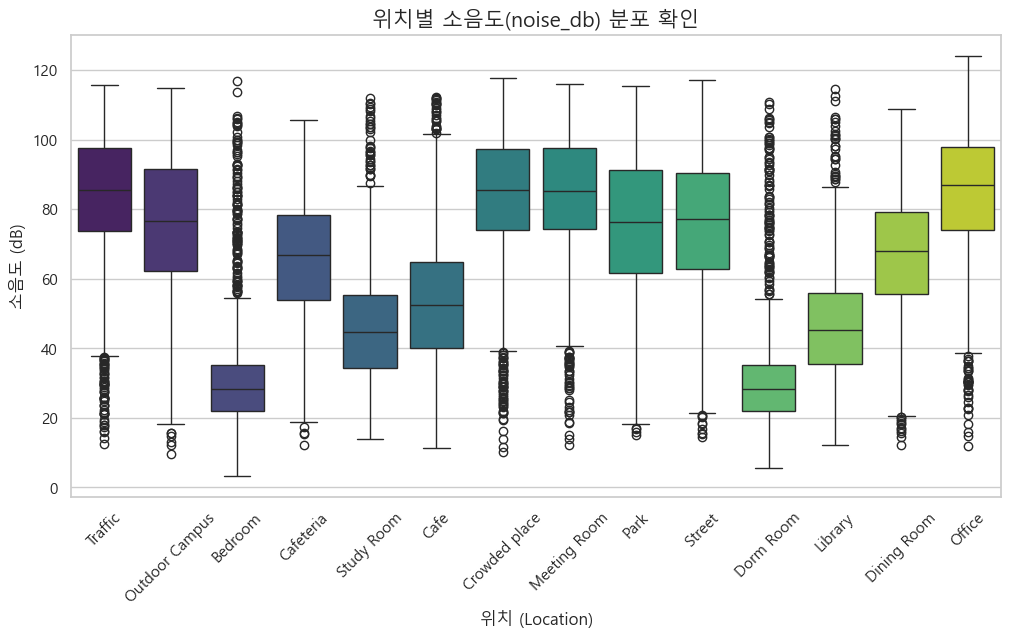

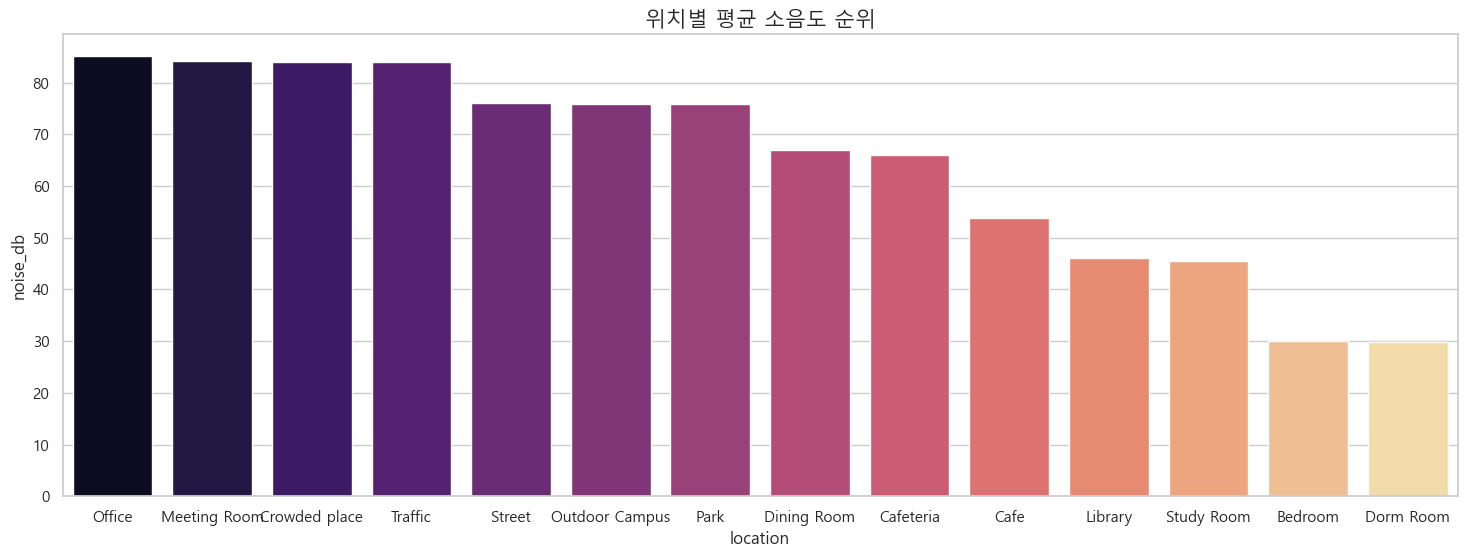

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'Malgun Gothic' 
plt.rcParams['axes.unicode_minus'] = False

# 위치별 소음도(noise_db) 기초 통계량 확인
location_noise_stats = df1.groupby('location')['noise_db'].describe()
print("--- 위치별 소음도 통계량 ---")
display(location_noise_stats)

# 위치별 소음도 분포 
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1, x='location', y='noise_db', hue='location', palette='viridis')
plt.title('위치별 소음도(noise_db) 분포 확인', fontsize=15)
plt.xlabel('위치 (Location)', fontsize=12)
plt.ylabel('소음도 (dB)', fontsize=12)
plt.xticks(rotation=45) 
plt.show()

# 위치별 평균 소음도 순위
plt.figure(figsize=(18, 6))
avg_noise = df1.groupby('location')['noise_db'].mean().sort_values(ascending=False).reset_index()
sns.barplot(data=avg_noise, x='location', y='noise_db', hue='location', palette='magma')
plt.title('위치별 평균 소음도 순위', fontsize=15)
plt.show()

    - 위치 카테고리화 기준
1. 소음 분포가 겹치는 위치는 하나로 묶는다
→ median, IQR(상자 폭), 꼬리(outlier) 패턴이 유사하면 같은 소음 체감 맥락으로 구분

2. 사용자 행동 맥락이 다른 경우만 분리한다
→ 소음 수치가 비슷해도 활동 목적이 다르면 분리

3. 추천 전략이 달라질 필요가 있는 경우만 남긴다
→ 음악 정책이 같다면 굳이 둘로 나눌 이유 없음

    -결과
- Bedroom / Dorm Room / Dining Room
    - 공통점: 낮은~중간 소음, 변동성 큼
    - 추천 전략 동일: 간섭 최소화
    - → home 으로 통합

- Study Room / Library
    - 소음 범위 유사(30~50 중심), outlier 존재
    - 목적: 집중
    - → library 로 통합

- Street / Traffic / Outdoor Campus
    - 전반적으로 고소음 + 변동성 상대적으로 낮음
    - “이동 중” 맥락
    - → moving 으로 통합

- Cafeteria / Cafe
    - 중~고소음, 대화/배경음 혼합
    - → cafe 로 통합

- Crowded Place
    - Cafe보다 소음 상단이 훨씬 높음
    - 마스킹 필요성 ↑
    - → co-working / crowded 대표로 사용

- Office / Meeting Room
    - 소음 수준은 중~고, 하지만 지속적·통제된 소음
    - 집중/업무 맥락
    - → co-working

- Park
    - 평균은 중간이지만 소음 성격이 다름
    - 자연음 + 개방감
    - → park 유지 (추천 태그 달라짐)

- Gym
    - 이 그래프엔 없지만 추천 전략이 완전히 달라서 반드시 별도 카테고리로 유지

---

### **2. 사용자의 행동(Behaviour)과 주변 환경 변수(온도, 습도, 소음) 간의 관계**

In [6]:
df1["behaviour"].value_counts()

behaviour
studying    7551
walking     6025
stressed    6021
sleeping    5984
eating      4419
Name: count, dtype: int64

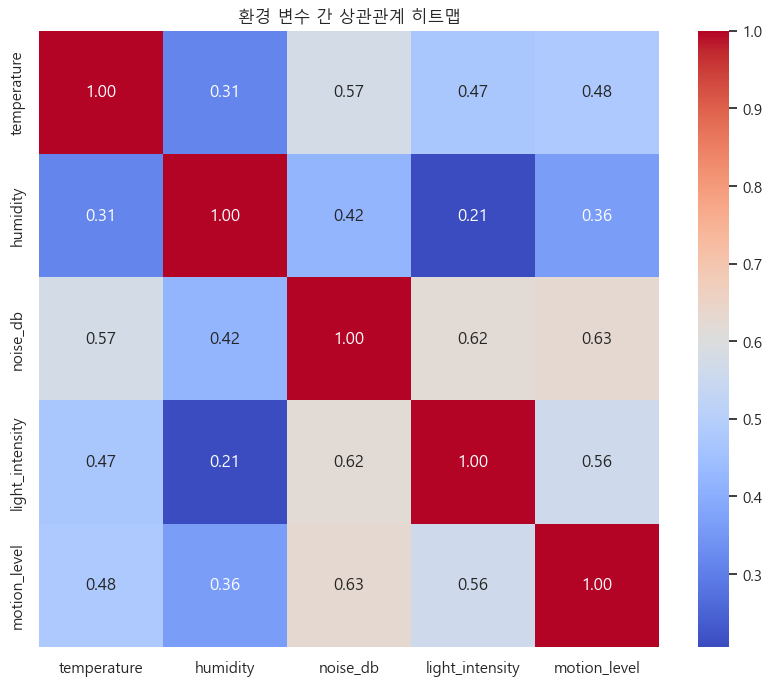

--- 행동별 환경 변수 평균치 ---


,temperature,humidity,noise_db,light_intensity,motion_level
behaviour,,,,,
eating,29.038054,65.235487,67.606412,448.541882,3.973655
sleeping,25.016324,61.476104,27.695685,89.978956,1.503976
stressed,31.972965,74.676668,87.505057,625.550307,6.484629
studying,27.037898,52.671391,44.707466,475.452722,2.488583
walking,30.472727,67.589823,77.808773,676.173958,7.982652


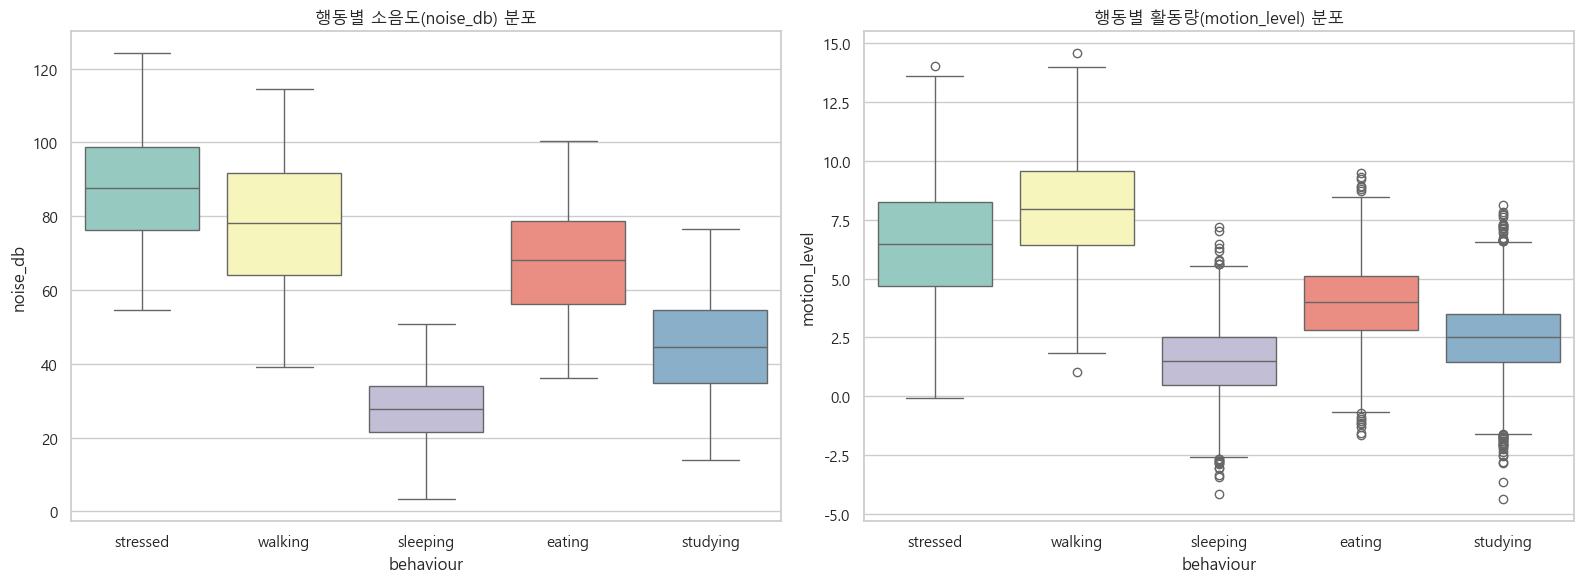

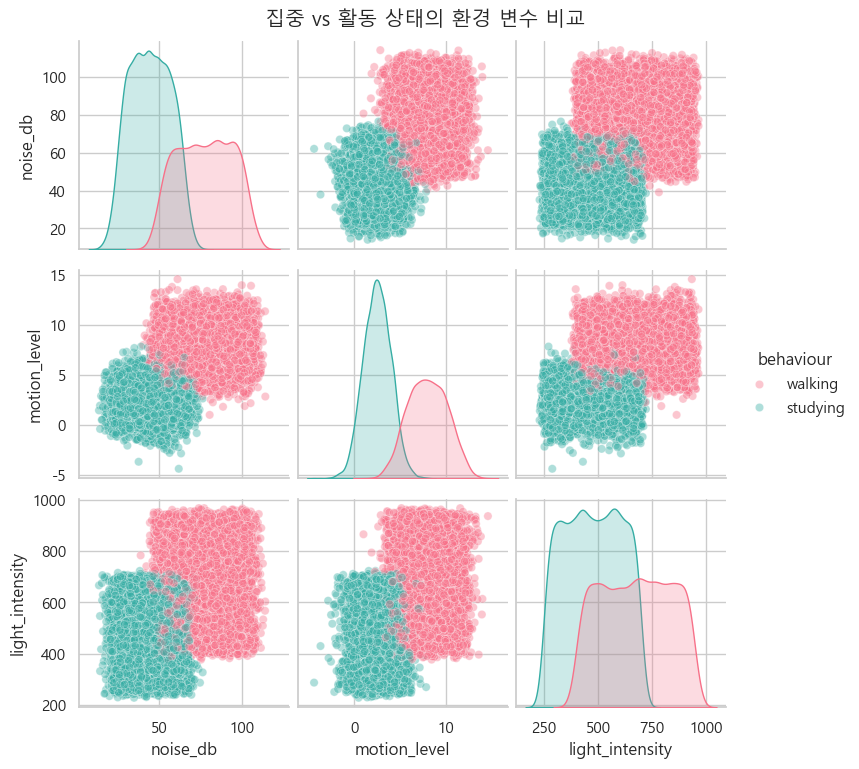

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 환경 변수 간의 상관관계 분석 (전체적인 경향성)
env_vars = ['temperature', 'humidity', 'noise_db', 'light_intensity', 'motion_level']
correlation = df1[env_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('환경 변수 간 상관관계 히트맵')
plt.show()

# 행동(Behaviour)별 환경 변수 평균값 비교
behaviour_env_mean = df1.groupby('behaviour')[env_vars].mean()
print("--- 행동별 환경 변수 평균치 ---")
display(behaviour_env_mean)

df1['behaviour'] = df1['behaviour'].str.strip()

target_behaviours = ['studying', 'walking', 'stressed', 'sleeping', 'eating']
df_filtered = df1[df1['behaviour'].isin(target_behaviours)]

# 행동별 소음도와 활동량 비교
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(data=df_filtered, x='behaviour', y='noise_db', hue='behaviour', ax=axes[0], palette='Set3')
axes[0].set_title('행동별 소음도(noise_db) 분포')

sns.boxplot(data=df_filtered, x='behaviour', y='motion_level', hue='behaviour', ax=axes[1], palette='Set3')
axes[1].set_title('행동별 활동량(motion_level) 분포')

plt.tight_layout()
plt.show()

# 집중(studying)과 활동(walking)의 환경 차이 
sns.pairplot(df1[df1['behaviour'].isin(['studying', 'walking'])], 
             vars=['noise_db', 'motion_level', 'light_intensity'],
             hue='behaviour', palette='husl', plot_kws={'alpha':0.4})
plt.suptitle('집중 vs 활동 상태의 환경 변수 비교', y=1.02)
plt.show()



    - 결과
- stressed 상태: 주변 온도와 소음, 습도가 가장 높음, 움직임 정도가 walking 다음으로 높음
- sleeping 상태: 소음과 조도,움직임 수준이 가장 낮음
- studying 상태: 소음 낮음, 움직임 sleeping다음으로 낮음
- eating 상태: 움직임 수준이 낮은 편, 소음은 높은 편
- walking 상태: stress다음으로 소음이 높음, 움직임 정도가 가장 높음

---

### **3. 위치(location)와 환경 변수(temperature, humidity, noise_db, light_inter, motion_level) 사이의 관계**


--- 위치별 환경 변수 평균 요약 ---


,noise_db,temperature,humidity,light_intensity,motion_level
location,,,,,
Office,85.081228,31.675668,73.547159,603.309983,6.272512
Meeting Room,84.256504,31.533796,72.768155,607.758683,6.285975
Crowded place,83.970379,31.526050,73.363720,606.431517,6.193937
Traffic,83.897845,31.570933,73.423582,611.582285,6.223701
Street,76.114617,30.299058,67.533123,658.918448,7.680350
Outdoor Campus,75.905326,30.298659,67.278303,656.996260,7.606763
Park,75.790069,30.267298,67.154016,654.650221,7.621298
Dining Room,66.957111,29.022573,65.255248,447.860556,4.036005
Cafeteria,65.931400,28.967393,64.781284,450.464973,4.046300


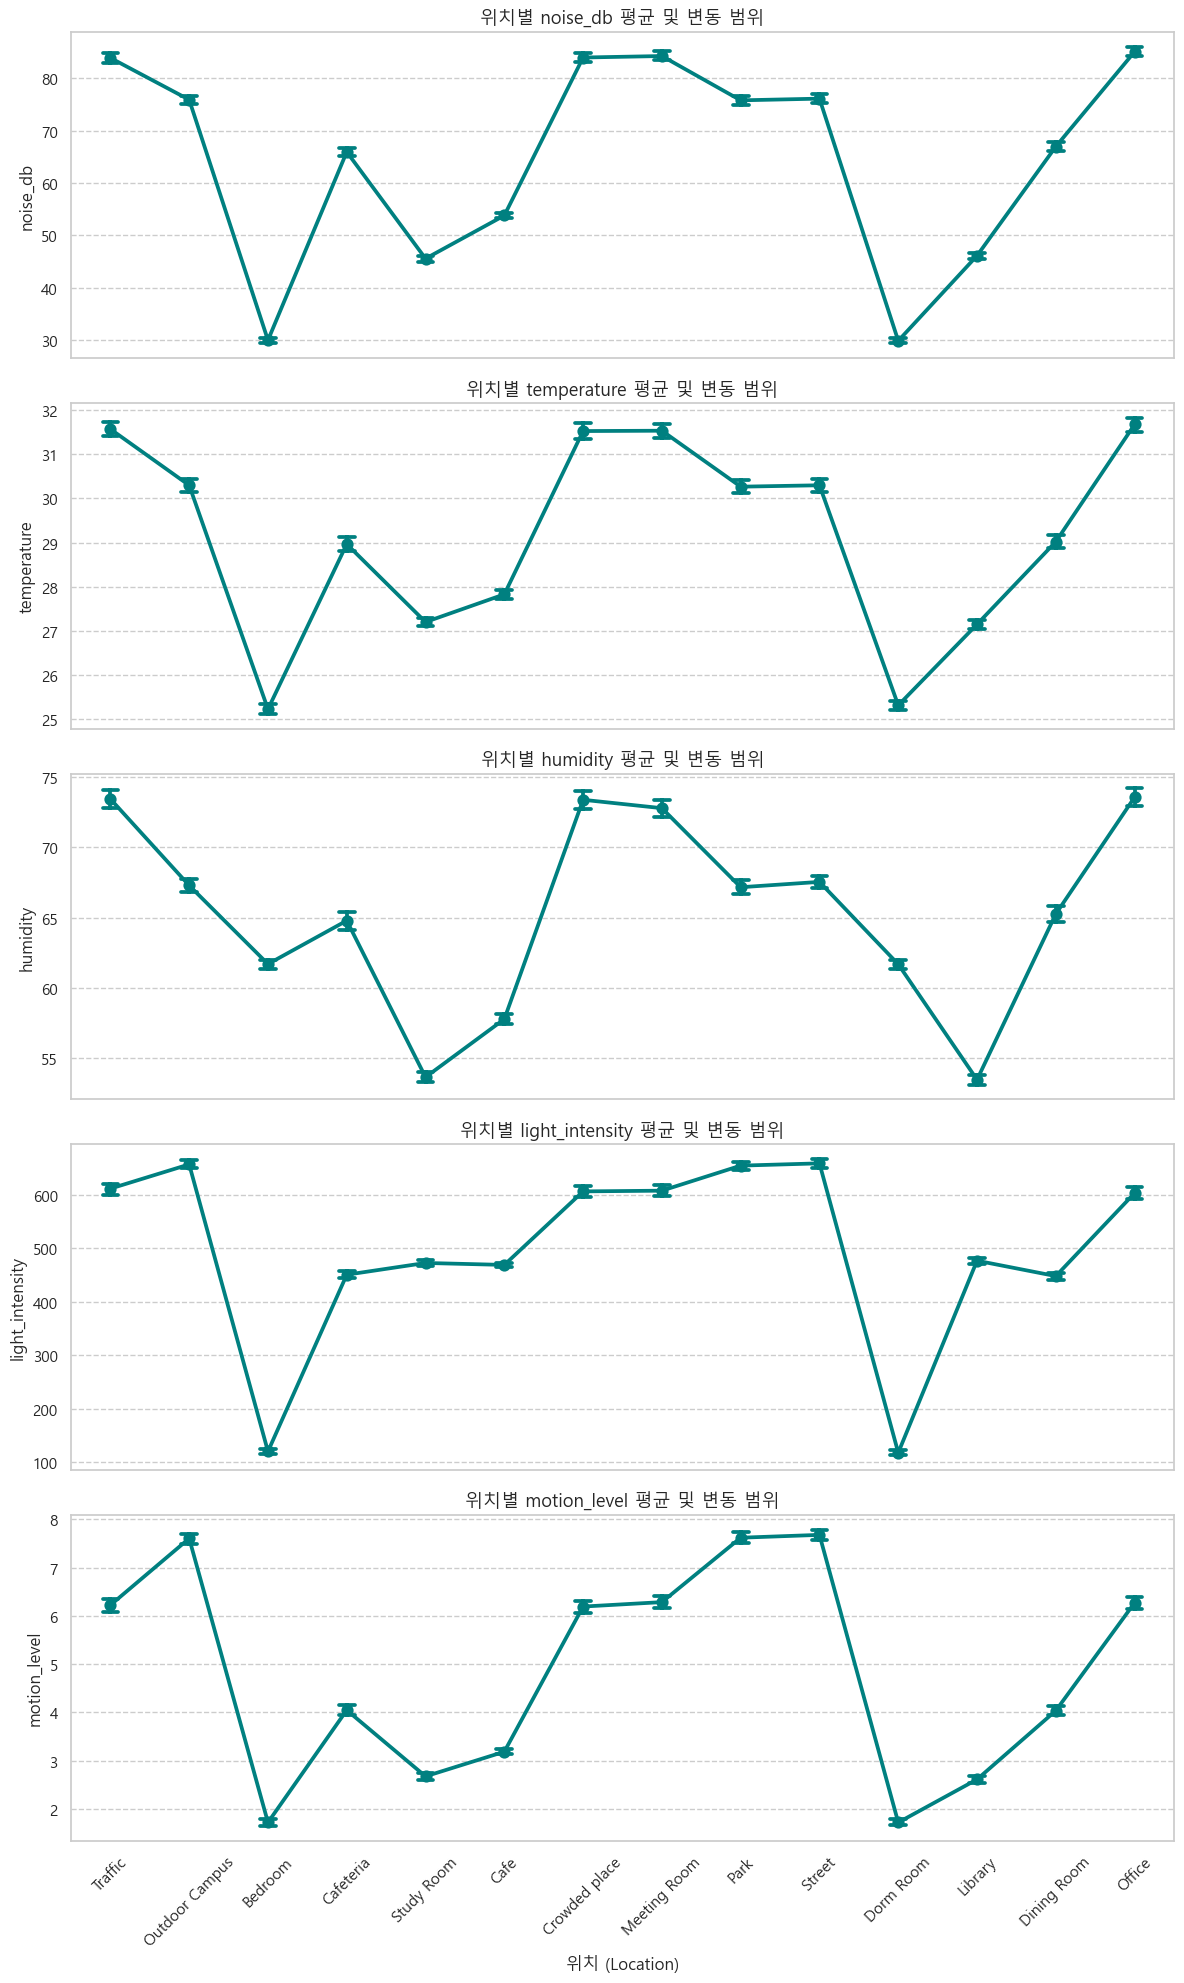

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df1['location'] = df1['location'].str.strip()

env_vars = ['noise_db', 'temperature', 'humidity', 'light_intensity', 'motion_level']

# 위치별 환경 변수 평균 계산 (
location_env_summary = df1.groupby('location')[env_vars].mean().sort_values(by='noise_db', ascending=False)
print("--- 위치별 환경 변수 평균 요약 ---")
display(location_env_summary)

# 위치별 주요 환경 변수 비교 
fig, axes = plt.subplots(len(env_vars), 1, figsize=(12, 20), sharex=True)

for i, var in enumerate(env_vars):
    sns.pointplot(data=df1, x='location', y=var, ax=axes[i], color='teal', capsize=.2)
    axes[i].set_title(f'위치별 {var} 평균 및 변동 범위', fontsize=13)
    axes[i].set_ylabel(var)
    axes[i].grid(True, axis='y', linestyle='--')

plt.xticks(rotation=45)
plt.xlabel('위치 (Location)', fontsize=12)
plt.tight_layout()
plt.show()

---

### **4. 사용자의 행동(behaviour)과 위치(location) 사이의 관계를 분석**


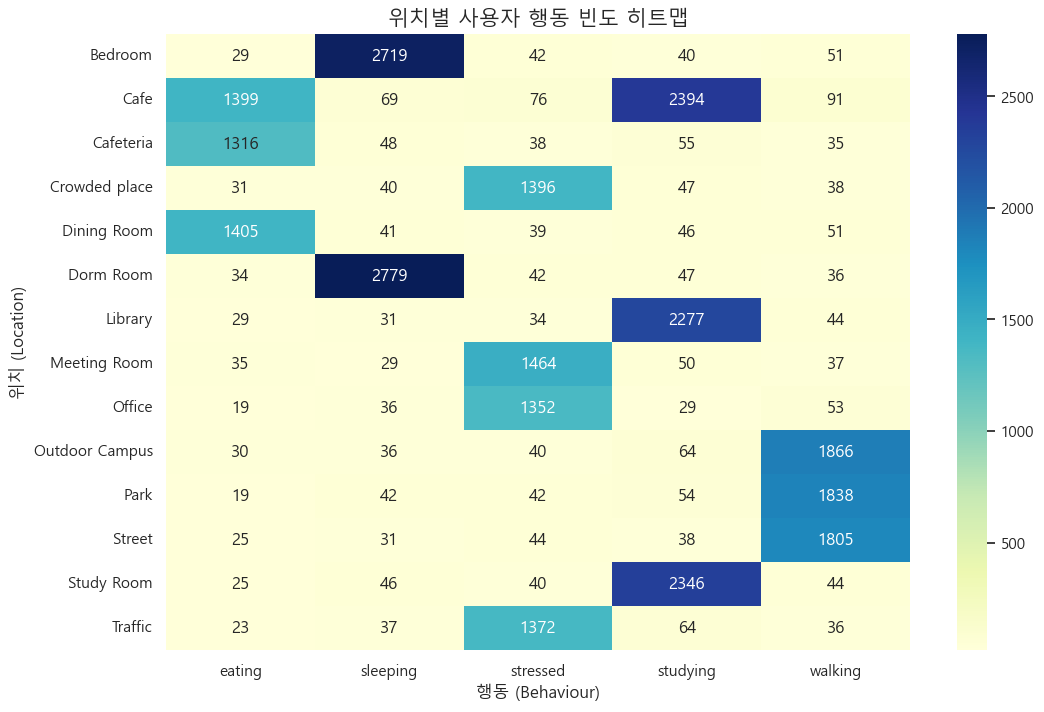

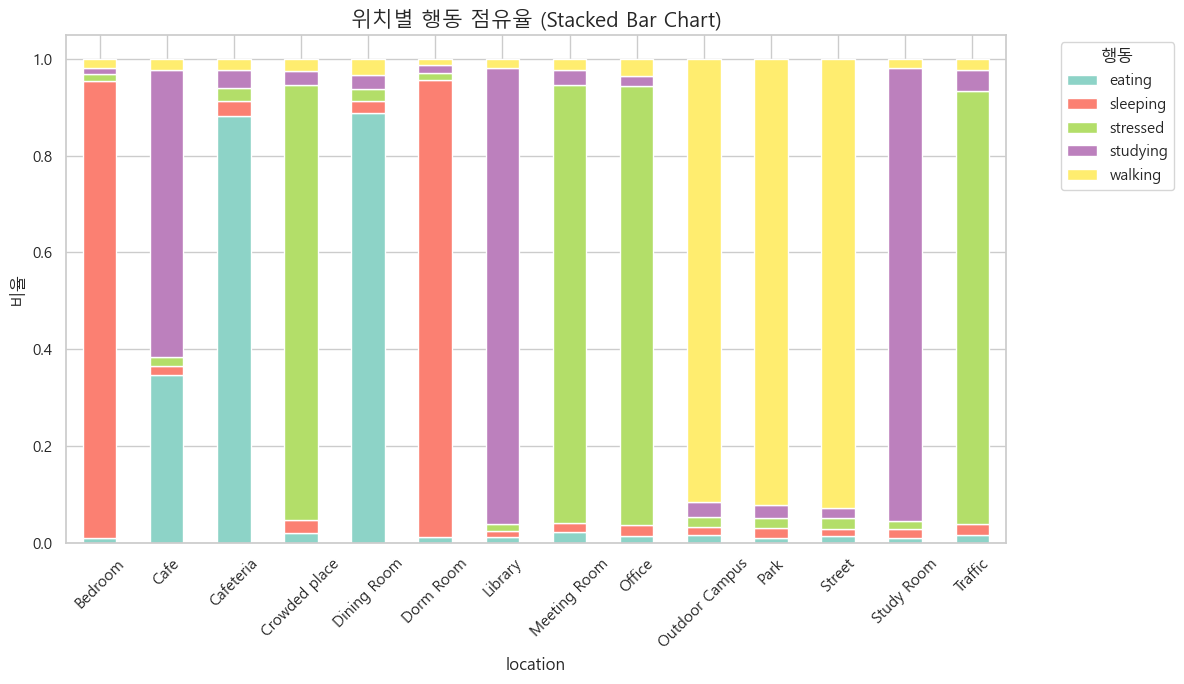

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df1['location'] = df1['location'].str.strip()
df1['behaviour'] = df1['behaviour'].str.strip()

target_behaviours = ['studying', 'walking', 'stressed', 'sleeping', 'eating']
df_filtered = df1[df1['behaviour'].isin(target_behaviours)]

# 위치(location)와 행동(behaviour) 교차표 생성
# 빈도수를 기반으로 생성
cross_tab = pd.crosstab(df_filtered['location'], df_filtered['behaviour'])

# 어떤 조합이 가장 많은지 비교
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('위치별 사용자 행동 빈도 히트맵', fontsize=15)
plt.xlabel('행동 (Behaviour)')
plt.ylabel('위치 (Location)')
plt.show()

# 위치별 행동 비율
cross_tab_prop = pd.crosstab(df_filtered['location'], df_filtered['behaviour'], normalize='index')

cross_tab_prop.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='Set3')
plt.title('위치별 행동 점유율 (Stacked Bar Chart)', fontsize=15)
plt.legend(title='행동', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('비율')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

    - 결과
- 수면중심 공간(Bedroom, Dorm Room):sleeping이 압도적으로 높음
- 집중/학습 공간(Library,Study room, cafe): studying이 가장 빈번하게 발생함, 특히 카페는 eating과 studying이 공존하는 공간임을 확인 할 수 있음
- 이동 및 야외공간(Street, Park, Outdoor): Walking이 지배적임
- 부정적 감정 유발 공간( Traffic, Office, Meeting Room, Crowed Place): stressed가 높게 나타남


    -인사이트
- 정적/휴식 (Bedroom, Dorm)	+ sleeping -> 저에너지: 낮은 energy, 높은 acousticness, 낮은 tempo
- 정적/집중 (Library, Study Room) + studying -> 안정감: 중간 정도의 valence, 낮은 speechiness (가사 없는 곡)
- 동적/활동 (Street, Park) + walking -> 고에너지: 높은 energy, 높은 danceability, 높은 bpm
- 스트레스 관리 (Traffic, Office) + stressed -> 기분 전환: 높은 valence (밝은 곡), 편안한 loudness

- 카페는 eating과 studying이 섞여 있으므로, 이때는 데시벨(noise_db) 데이터를 추가로 확인해야 함. 소음이 적당하면(백색소음) 공부 음악을, 소음이 크면 대화나 식사에 어울리는 대중적인 음악을 추천하는 방식
- Traffic이나 Crowded place처럼 스트레스 수치가 높은 곳에 진입하면, 사용자가 요청하지 않아도 '심신 안정용 플레이리스트'를 푸시 알림으로 제안하는 로직이 가능

---

### **5. 핵심 변수 3가지(위치 x 소음 x 목표) 간의 삼각 관계 분석**


--- 위치 및 행동별 평균 소음도 (dB) ---


behaviour,eating,sleeping,stressed,studying,walking
location,,,,,
Bedroom,65.566047,27.595989,86.317288,48.020009,79.077224
Cafe,67.601164,27.707086,90.530029,44.814394,77.684275
Cafeteria,67.322414,29.075196,86.780762,45.806100,77.189148
Crowded place,70.264442,29.282295,87.366642,43.534221,76.689466
Dining Room,68.130487,27.506107,86.304269,43.735821,74.291632
Dorm Room,63.661265,27.754944,86.639186,43.872286,81.970807
Library,65.525257,27.261521,87.888272,44.933005,76.553004
Meeting Room,67.097398,28.984860,87.205049,44.812816,80.226839
Office,66.945784,29.297801,87.813025,46.995662,79.740010


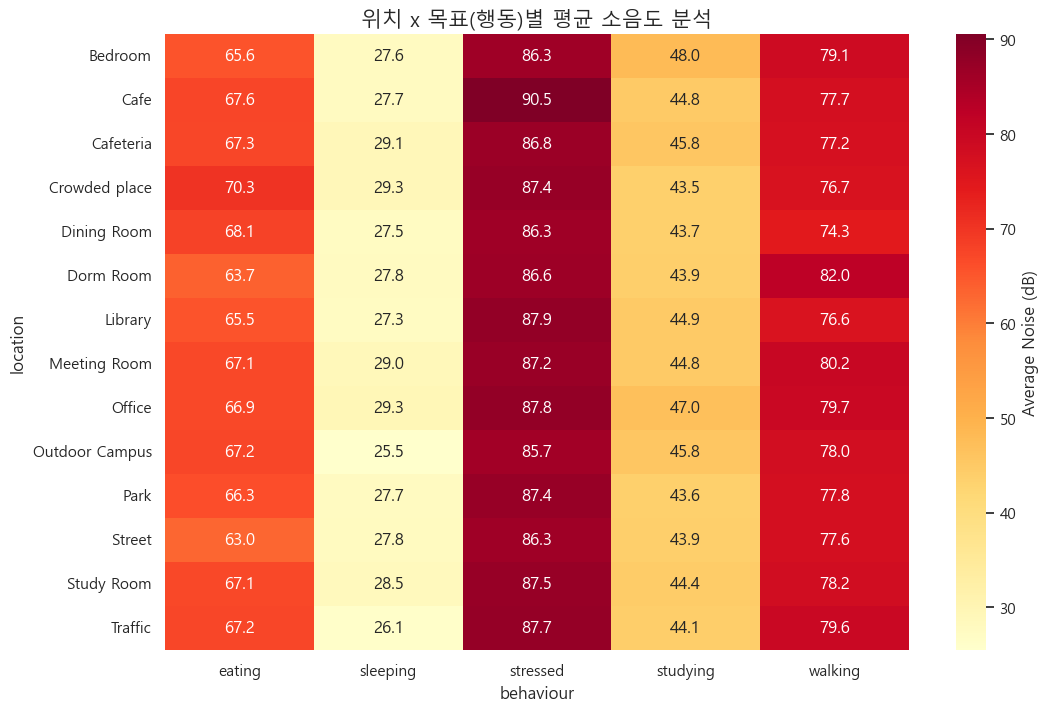

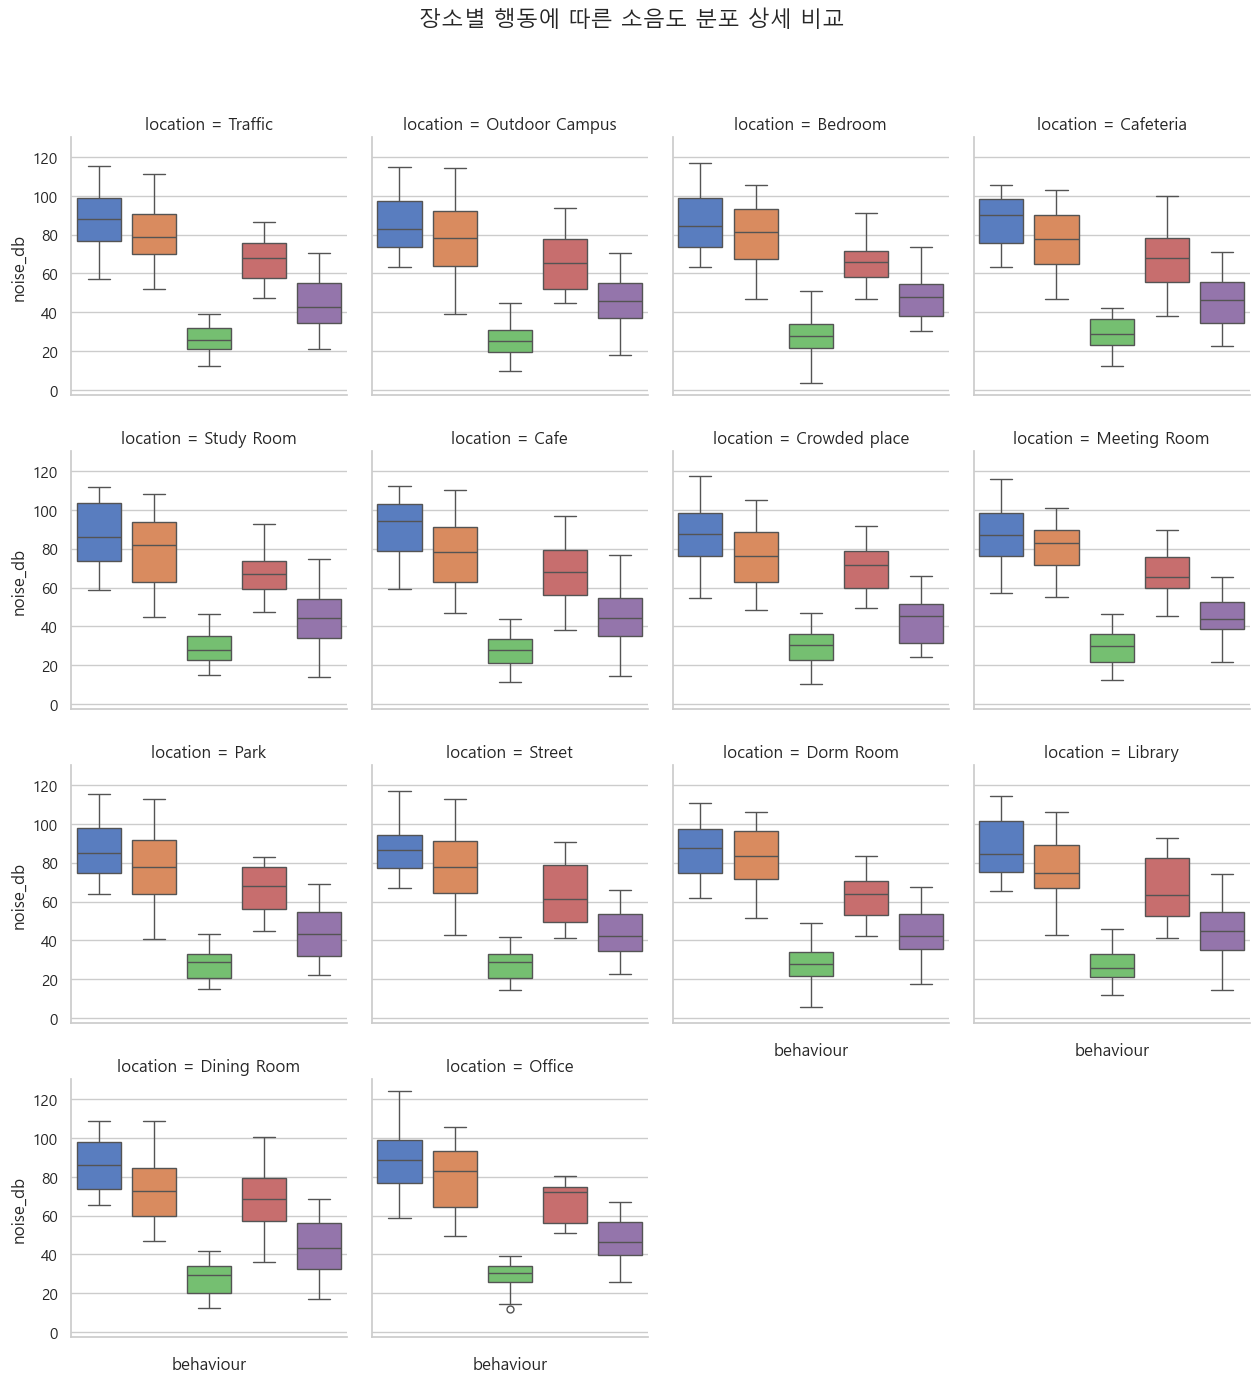

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df1['location'] = df1['location'].str.strip()
df1['behaviour'] = df1['behaviour'].str.strip()

target_behaviours = ['studying', 'walking', 'stressed', 'sleeping', 'eating']
df_core = df1[df1['behaviour'].isin(target_behaviours)].copy()

# 위치 x 행동별 소음도 평균
pivot_noise = df_core.pivot_table(values='noise_db', 
                                  index='location', 
                                  columns='behaviour', 
                                  aggfunc='mean')

print("--- 위치 및 행동별 평균 소음도 (dB) ---")
display(pivot_noise)

# 위치 x 행동 조합의 소음 강도
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_noise, annot=True, fmt=".1f", cmap="YlOrRd", cbar_kws={'label': 'Average Noise (dB)'})
plt.title('위치 x 목표(행동)별 평균 소음도 분석', fontsize=15)
plt.show()

# 위치별 행동에 따른 소음도 분포 상세
g = sns.catplot(
    data=df_core,
    x='behaviour',
    y='noise_db',
    hue= 'behaviour',
    col='location',
    kind='box',
    col_wrap=4,
    palette='muted',
    height=4,
    aspect=0.8
)

g.set_xticklabels(rotation=30, ha='right')

g.figure.subplots_adjust(top=0.9, bottom=0.15)
g.figure.suptitle('장소별 행동에 따른 소음도 분포 상세 비교', fontsize=16)
plt.show()

    - 결과
- 행동 자체에 따른 소음도 차이가 명확함
    - 소음군 (sleeping): 모든 장소에서 25~29dB 사이를 유지함. 이는 속삭이는 소리보다 작은 수준으로, 아주 조용한 음악이나 백색소음(ASMR) 추천이 필수적임을 보여줌
    - 저소음 집중군 (studying): 장소에 상관없이 43~48dB 수준임. 도서관이나 카페에서도 공부 중일 때는 소음이 억제된 환경에 있음을 뜻하므로, 집중력을 방해하지 않는 'Lofi'나 'Deep Focus' 계열의 음악이 적합함.
    - 고소음 활동/감정군 (walking, stressed): 두 행동 모두 70~90dB에 달하는 매우 높은 수치를 보임.
        - 특히 stressed 상태일 때의 소음도가 대부분 86dB 이상으로 가장 높음. 이는 주변의 시끄러운 환경이 스트레스를 유발했거나, 스트레스 상황에서 소음 인지가 강해진 결과일 수 있음.
- 장소의 일반적인 상식과 다른 의외의 수치가 확인됨
    - 카페에서 공부할 때(44.8dB)보다 식사할 때(67.6dB) 소음이 훨씬 큼. 즉, "카페 접속 = 공부 음악"이라는 단순 공식보다는 "카페 + 40dB대 = 공부용 음악", "카페 + 60dB대 = 일상 팝"으로 세분화해야함.
    - 침실이라도 walking(79dB)이나 stressed(86dB) 상태일 때는 길거리(Street)보다 소음도가 높게 측정됨. 장소에만 의존하지 말고 실제 실시간 소음 데이터를 읽어와야 하는 이유가 됨.
    - 의외로 Crowded place(43.5dB)나 Street(43.9dB)에서의 공부 소음도가 Bedroom(48.0dB)보다 낮거나 비슷합니다. 이는 사용자가 시끄러운 곳에서도 소음 차단(노이즈 캔슬링 등) 환경을 구축했음을 암시함